# Common Neighbor Rule in PyC Subgraph (Th=100)

In [1]:
import os
import random
from time import time
import pandas as pd
import numpy as np
import networkx as nx

from utils.graph_creation import *
from utils.common_neighbor_rule import *
from utils.visualization import *

## Create PyC Subgraph

In [2]:
pyc_synapses = pd.read_csv('data/synapses.csv')
pyc_synapses

,pre,post
0,648518346349539437,648518346349531254
1,648518346349537978,648518346349537300
2,648518346349533058,648518346349538715
3,648518346349539333,648518346349539806
4,648518346349523975,648518346349537716
...,...,...
1976,648518346349539110,648518346349538440
1977,648518346349539110,648518346349523993
1978,648518346349539110,648518346349524141
1979,648518346349539110,648518346349539900


In [3]:
pyc_soma = pd.read_csv('data/soma.csv')
pyc_soma

,segmentation,segment_id,manual_id,loc,axon_len,dendrite_len
0,185,648518346349491311,466,[314028 159940 77280],0.000000,1441.069000
1,185,648518346349492130,499,[291484 145484 80960],0.000000,747.483938
2,185,648518346349492197,503,[270948 158088 86240],0.000000,586.186063
3,185,648518346349492682,163,[461372 212624 27640],643.547438,979.816375
4,185,648518346349493472,549,[431864 156576 85720],0.000000,0.000000
...,...,...,...,...,...,...
358,185,648518346349540048,80,[349132 163492 11480],961.385250,1321.124250
359,185,648518346349540051,259,[444892 247424 47480],61.243563,1999.626500
360,185,648518346349540053,102,[446104 253936 18320],56.518617,1612.330500
361,185,648518346349540055,139,[340468 248332 23400],46.961094,3101.869750


In [4]:
# create the simple directed graph (no self-loops, no multi-edges)
# treat multiple synapses as one connection
pyc_subgraph = synapses_to_connections(pyc_synapses[['pre','post']])
# remove self-loops
g_actual = remove_autapses(edges_to_graph(pyc_subgraph))
g_actual.add_nodes_from(pyc_soma["segment_id"])

In [5]:
print(nx.info(g_actual))

Name: 
Type: DiGraph
Number of nodes: 363
Number of edges: 1750
Average in degree:   4.8209
Average out degree:   4.8209


In [6]:
axls = {n:np.array(pyc_soma[pyc_soma["segment_id"] == n]["axon_len"])[0] for n in g_actual.nodes()}

In [7]:
g_th300 = get_thresholded_graph(g_actual, axls, 300)
print(nx.info(g_th300))

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 622
Average in degree:   6.2200
Average out degree:   6.2200


## Common Neighbor Rule

In [8]:
%%time
# calculate common neighbor stats in the observation
obs_cnr_stats = get_cnr_stats(g_th300)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 148 ms


- "undir_pair" - number of pairs with [bin] common neighbor
- "dir_spair" - number of pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_ppair" - number of pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_conn" - number of connected pairs with [bin] common neighbor
- "dir_sconn" - number of connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_pconn" - number of connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_uni_sconn" - number of unidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_uni_pconn" - number of unidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_bi_sconn" - number of bidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_bi_pconn" - number of bidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_perc" - percentage of pairs with [bin] common neighbor to be connected
- "dir_sperc" - percentage of pairs with [bin] strict common successor to be connected
- "dir_pperc" - percentage of pairs with [bin] strict common predcessor to be connected

In [9]:
obs_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,1240.0,3576.0,2997.0,85.0,367.0,327.0,345.0,310.0,22.0,17.0,0.068548,0.102629,0.109109
1,1500.0,1002.0,1416.0,154.0,143.0,187.0,137.0,178.0,6.0,9.0,0.102667,0.142715,0.132062
2,1034.0,256.0,421.0,135.0,47.0,59.0,46.0,57.0,1.0,2.0,0.130561,0.183594,0.140143
3,613.0,80.0,99.0,94.0,22.0,18.0,22.0,17.0,0.0,1.0,0.153344,0.275000,0.181818
4,297.0,17.0,15.0,52.0,6.0,2.0,6.0,2.0,0.0,0.0,0.175084,0.352941,0.133333
5,135.0,13.0,2.0,30.0,5.0,0.0,5.0,0.0,0.0,0.0,0.222222,0.384615,0.000000
6,75.0,5.0,0.0,17.0,3.0,0.0,3.0,0.0,0.0,0.0,0.226667,0.600000,0.000000
7,28.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392857,0.000000,0.000000
8,17.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.000000,0.000000
9,11.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.000000,0.000000


In [10]:
%%time
s=100 # total 100 samples (100 continous samples)
cfg_cnr_samples = continuous_sample_cnr(g_th300, samples=s, niters=int(1e4))


CPU times: user 44.1 s, sys: 52 ms, total: 44.2 s
Wall time: 44.2 s


In [11]:
cfg_cnr_stats, cfg_cnr_stats_std = cnr_mean_std(cfg_cnr_samples)

In [12]:
cfg_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,1198.41,3540.97,2970.48,100.83,372.96,337.25,362.18,326.02,10.78,11.23,0.084107,0.105328,0.113538
1,1486.34,1038.46,1456.95,150.14,147.45,190.37,141.97,183.59,5.48,6.78,0.100978,0.142018,0.130681
2,1076.75,263.30,418.70,135.07,51.46,57.86,48.93,55.73,2.53,2.13,0.125374,0.195373,0.138083
3,615.08,71.54,86.87,94.66,17.78,13.36,16.71,12.89,1.07,0.47,0.153876,0.248690,0.153513
4,308.76,23.06,14.65,56.50,7.10,2.10,6.64,2.01,0.46,0.09,0.183002,0.312461,0.146796
5,144.87,7.36,2.06,32.02,2.59,0.29,2.38,0.28,0.21,0.01,0.221133,0.354688,0.125500
6,66.61,2.88,0.28,16.11,1.10,0.06,0.99,0.06,0.11,0.00,0.240984,0.369167,0.055000
7,29.65,1.30,0.01,8.13,0.43,0.00,0.39,0.00,0.04,0.00,0.273967,0.260000,0.000000
8,13.47,0.58,0.00,4.49,0.19,0.00,0.19,0.00,0.00,0.00,0.331721,0.158333,0.000000
9,10.06,0.55,0.00,3.34,0.23,0.00,0.20,0.00,0.03,0.00,0.331817,0.181667,0.000000


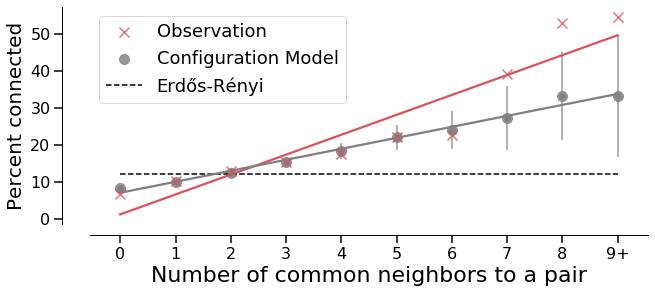

In [13]:
E, N = len(g_th300.edges), len(g_th300.nodes)
ER_p_null = (1 - E / (N*(N-1)))**2

plot_cnr(obs_cnr_stats, cfg_cnr_stats, cfg_cnr_stats_std, ER_p_null, figsize=(10,4), fname="th300/th300_cnr")

In [14]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), obs_cnr_stats["undir_perc"])

(0.8782747502794787, 6.319837285888977e-05)

In [15]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), cfg_cnr_stats["undir_perc"])

(0.9870077350825275, 7.831899220818645e-09)

## Common Neighbor Rule (Generalized Null Models)

In [16]:
%%time
s=100 # total 100 samples (100 continous samples)
cfg_cnr_samples_GE = continuous_sample_cnr_GE(g_th300, samples=s, niters=int(1e4))


CPU times: user 48.9 s, sys: 56 ms, total: 49 s
Wall time: 49.1 s


In [17]:
cfg_cnr_stats_GE, cfg_cnr_stats_std_GE = cnr_mean_std(cfg_cnr_samples_GE)

In [18]:
cfg_cnr_stats_GE

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,1234.60,3572.91,3013.08,104.74,374.07,341.93,358.24,325.81,15.83,16.12,0.084869,0.104697,0.113481
1,1512.89,1021.28,1438.77,156.71,143.55,183.77,135.61,174.33,7.94,9.44,0.103565,0.140570,0.127737
2,1071.40,253.42,399.33,134.36,48.49,53.56,45.41,50.89,3.08,2.67,0.125406,0.191510,0.134068
3,599.68,68.28,82.86,89.87,16.78,11.34,15.39,10.76,1.39,0.58,0.149811,0.246486,0.136533
4,293.28,22.47,13.74,52.42,6.21,2.11,5.76,1.93,0.45,0.18,0.178397,0.276886,0.153166
5,133.42,6.62,1.97,27.58,2.26,0.24,2.04,0.23,0.22,0.01,0.207170,0.348194,0.121333
6,59.47,2.71,0.23,14.78,0.93,0.05,0.89,0.05,0.04,0.00,0.247966,0.333643,0.050000
7,25.57,1.23,0.02,6.93,0.41,0.00,0.40,0.00,0.01,0.00,0.269627,0.253500,0.000000
8,11.52,0.60,0.00,3.10,0.15,0.00,0.12,0.00,0.03,0.00,0.268785,0.110000,0.000000
9,8.17,0.48,0.00,2.51,0.15,0.00,0.14,0.00,0.01,0.00,0.303056,0.150000,0.000000


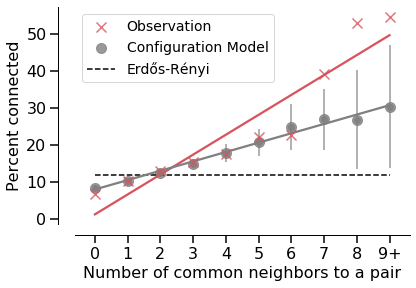

In [19]:
_, two_pr_GE = compute_three_neuron_motif_probabilities_GE(g_th300)
ER_p_null_GE = 1 - 2*two_pr_GE["pr_uni"] - two_pr_GE["pr_bi"]

plot_cnr(obs_cnr_stats, cfg_cnr_stats_GE, cfg_cnr_stats_std_GE, ER_p_null_GE, 
         figsize=(6,4), fontsizes=(16, 16, 16, 14), fname="th300/th300_cnr_GE")

In [20]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), obs_cnr_stats["undir_perc"])

(0.8782747502794787, 6.319837285888977e-05)

In [21]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), cfg_cnr_stats_GE["undir_perc"])

(0.9864112483323482, 9.374555266701012e-09)

## Generate Plots

In [25]:
def plot_cnr_adapt(actual_ucnr, config_ucnr, config_ucnr_std, ER_p_null, 
             figsize=(10,4), fname="temp", fontsizes=(20, 22, 14, 18)):
    f, ax = plt.subplots(1, 1, figsize=figsize)
    x = np.arange(10)

    sns.regplot(x=x, y=actual_ucnr["undir_perc"]*100, marker='x',
                label="Observation", color="#D8545D", ci=None, scatter_kws={'s':100, "zorder":10})
    sns.regplot(x=x, y=config_ucnr["undir_perc"]*100, label="Configuration Model", color='gray', ci=None, 
                scatter_kws={'s':100})
    # sns.regplot(x=x, y=erdos_cnr*100, label="Erdős-Rényi")
    ax.errorbar(x, config_ucnr["undir_perc"]*100, yerr=config_ucnr_std["undir_perc_std"]*100, 
                color='gray', fmt='o', alpha=0.8)
    plt.hlines((1-ER_p_null)*100, 0, 9, linestyle="--", label="Erdős-Rényi")

    ax.tick_params(length=8, width=1.5, labelsize=16)
    ax.set_ylabel('Percent connected', fontsize=fontsizes[0])
    ax.set_xlabel('Number of common neighbors', fontsize=fontsizes[1])
    x_labels = [0, 1,2,3,4,5,6,7,8,"9+"]
    ax.set_xticks(np.arange(len(x_labels)));
    ax.set_xticklabels(x_labels, fontsize=fontsizes[2]);

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))

    ax.set_ylim(bottom=-1.4)

#     ax.legend()
#     ax.legend(fontsize=fontsizes[3])

    f.savefig("figures/{}.pdf".format(fname), bbox_inches='tight')  

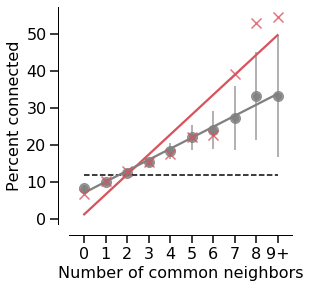

In [26]:
plot_cnr_adapt(obs_cnr_stats, cfg_cnr_stats, cfg_cnr_stats_std, ER_p_null_GE, 
         figsize=(4,4), fontsizes=(16, 16, 16, 14), fname="th300/th300_cnr_CGE")